In [2]:
###  Assignment Part-I
##  A US-based housing company named Surprise Housing has decided to enter the Australian market

In [3]:
# Importing the required libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Loading the Dataset

In [4]:
df=pd.read_csv(r"C:\ML\train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

#### Inspecting the Dataset

In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe([0.25,0.50,0.75,0.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
99%       0.000000    700.000000    12.000000  2010.000000  442567.010000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[9 rows x 38 columns]

In [8]:
# Chekcing the percentage of Null values in all the columns
print('Percentage of Missing Values in each column is as follows:')
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),2) > 0 ] )

Percentage of Missing Values in each column is as follows:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


18 features have missing values, out of which 5 features have more than 45% missing values.

#### Exploratory Data Analysis

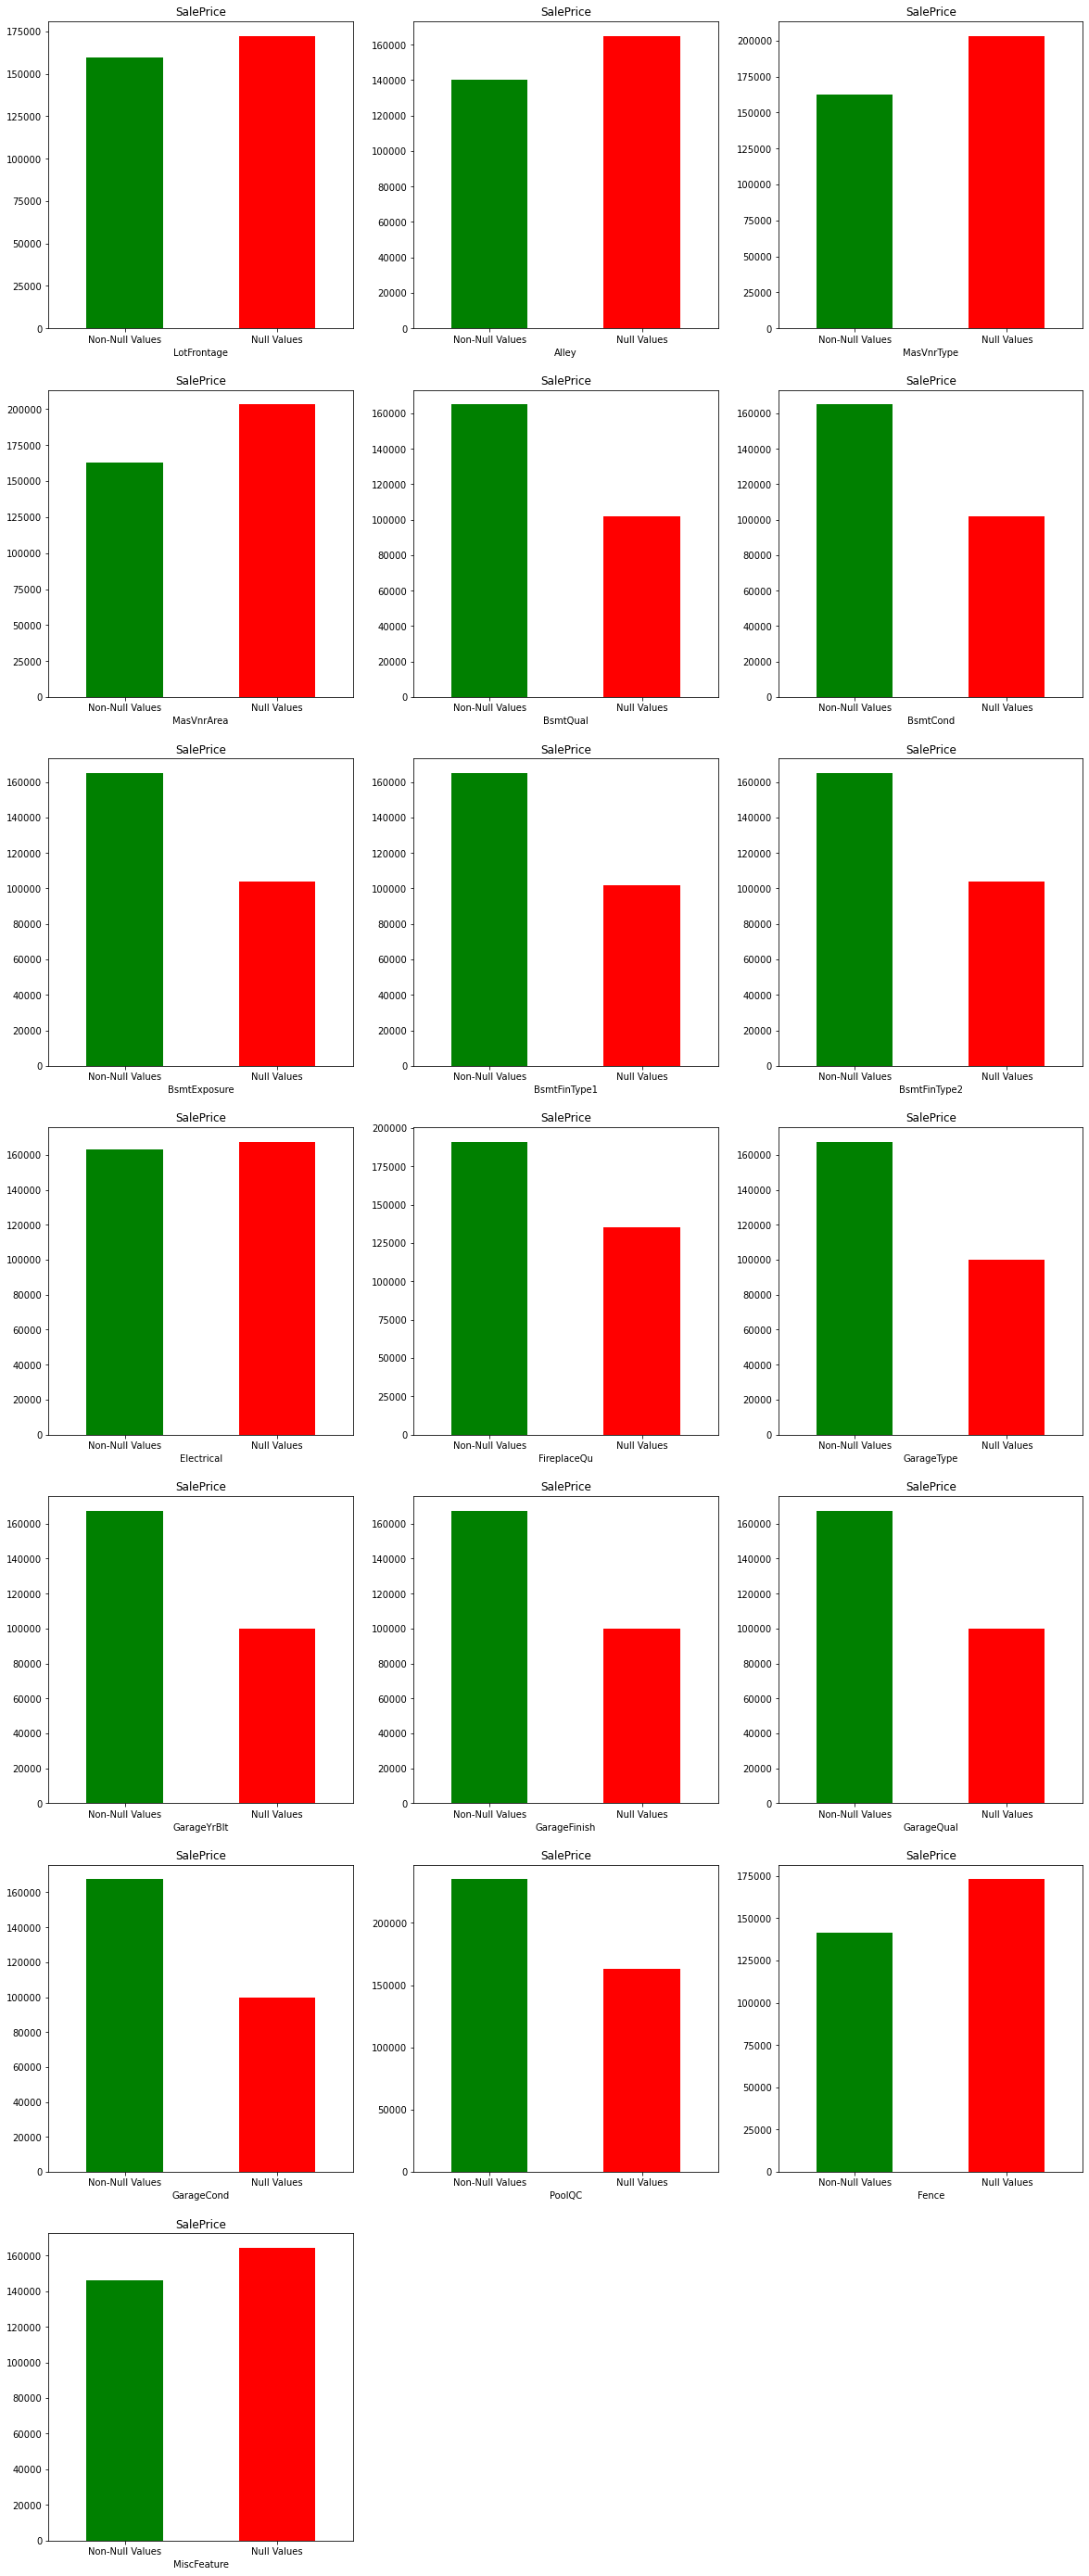

In [9]:
# Checking if NaN Values have any impact on the Sale Price or not
nan_col = []
for i in df.columns:
    if df[i].isnull().sum() > 0:
        nan_col.append(i)
df_copy = df.copy()    
fig,axs= plt.subplots(7,3,figsize=(20,50),squeeze=True)
for i,ax in zip(nan_col,axs.flatten()):    
    df_copy[i] = np.where(df_copy[i].isnull(), 'Null Values', 'Non-Null Values') 
    df_copy.groupby(i)['SalePrice'].median().plot.bar(color = list('gr'),rot=0,ax=ax,subplots=True)
axs[6,1].set_axis_off()    
axs[6,2].set_axis_off() 
plt.show()

The NaN values have some impact on the Sale Price. We will handle the missing values in the feature engineering section.

In [10]:
# Checking the number of numerical features and the number of categorical features
num_col = []
cat_col = []
for i in df.columns:
    if df[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
print('There are', len(num_col) ,'numerical features in the dataset')
print('There are', len(cat_col), 'categorical features in the dataset')

There are 38 numerical features in the dataset
There are 43 categorical features in the dataset


Text(0.5, 1.0, 'House Price vs YearSold')

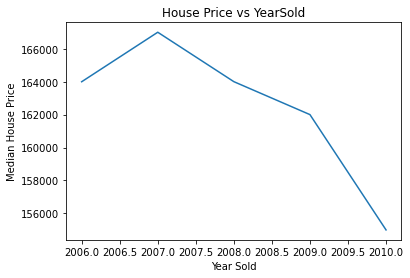

In [11]:
# Chekcing if the median price changes with the year sold
df['YrSold'] = df['YrSold'].astype('int')
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

We can see that the average proce decreases after 2007 and after the 2008 housing bubble crash, the house prices dropped significantly. Thus the year in which the house was sold has a considerable effect on the sale price.

In [12]:
# Extracting the Year Features from the Dataset and then checking how the price varies with respect to the age of the estate
yr_cols = []
for i in df.columns:
    if 'Yr' in i or 'Year' in i or 'year' in i or 'yr' in i:
        yr_cols.append(i)
print('List of features with Year are:')
print(yr_cols)

List of features with Year are:
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


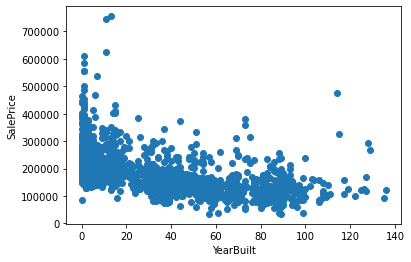

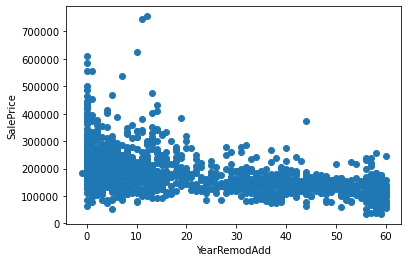

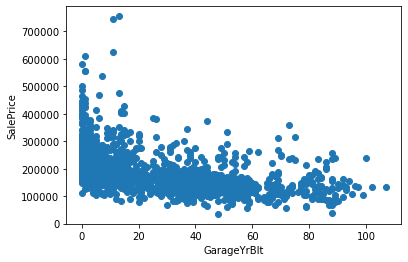

In [13]:
# Comparing the Age of the Building / Renovated Building / Garage with the Sold Price
for feature in yr_cols:
    if feature!='YrSold':
        data=df.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

It looks like that the new properties are costlier than the old properties.

In [14]:
# Dropping ID Columns from dataset 
df.drop('Id', axis=1, inplace=True)

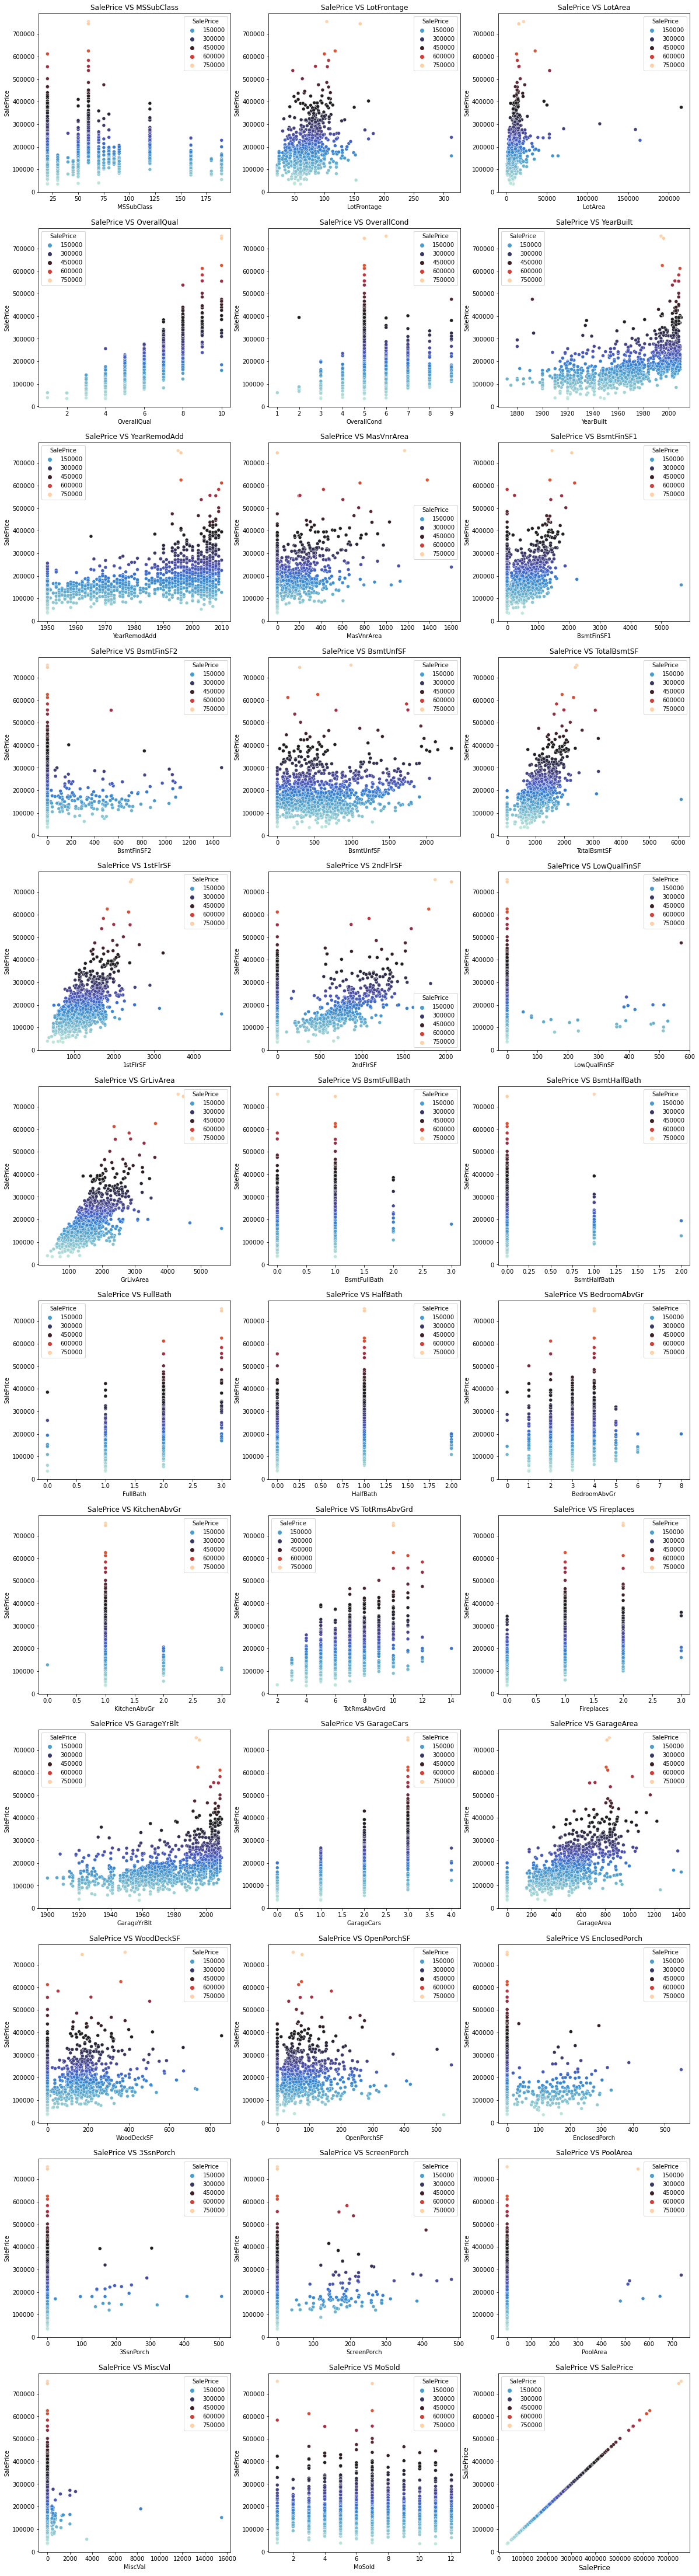

In [17]:
#Visualising numerical predictor variables with Target Variables
df_num = df.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

Observations from the above plot:-
- New properties are costlier than older properties. 
- GRLiving Area has a direct corelation with the proce of the property.
- Total basement area, which is linearly related with the total living area, also is directly proportional to the price of the property.
- Month sold has no effect on the price.

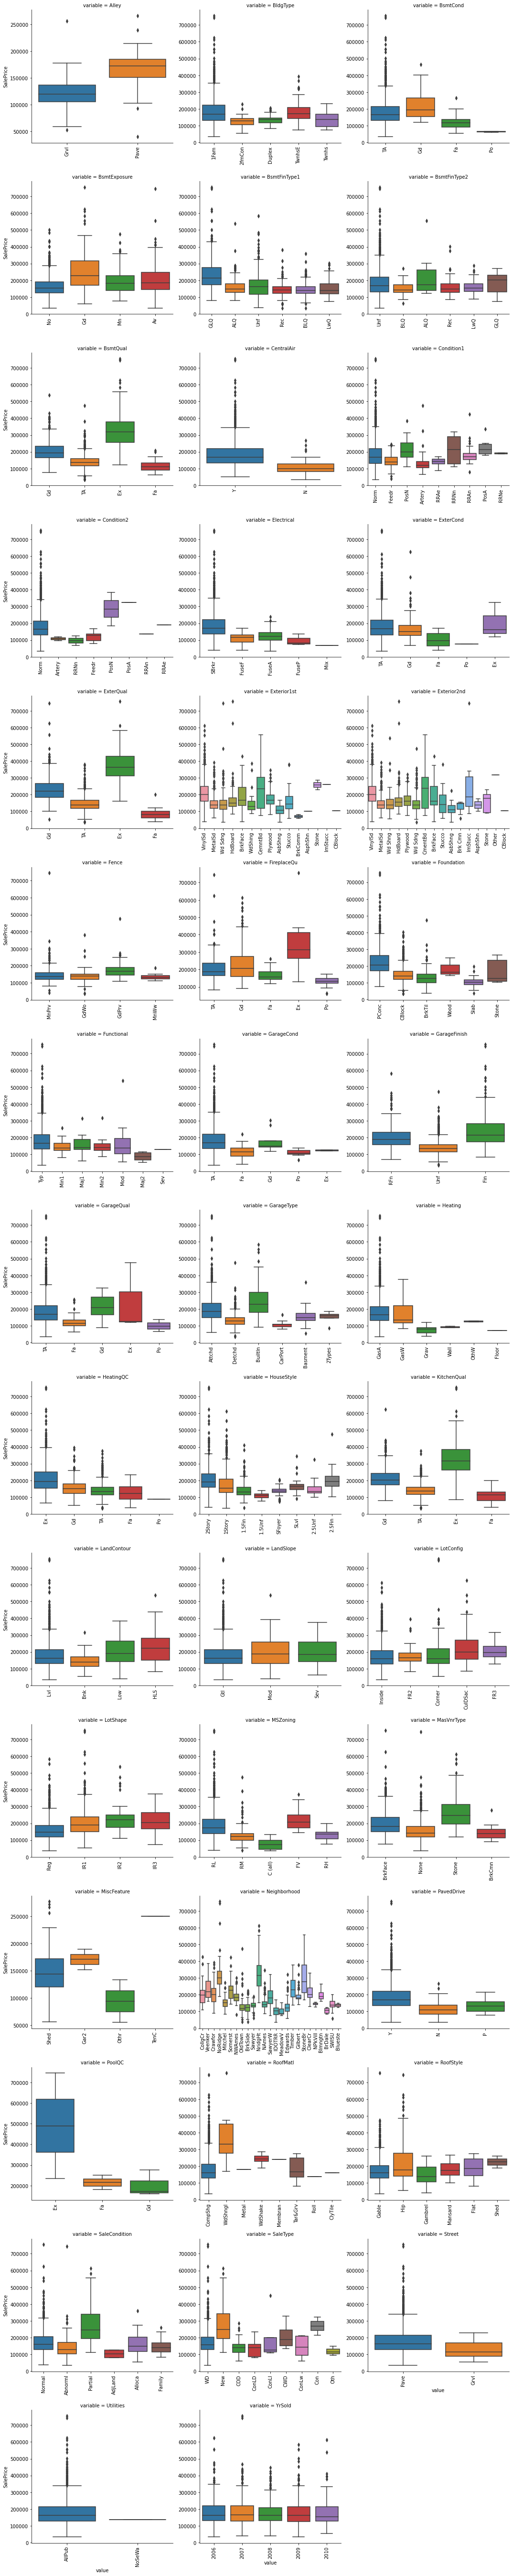

In [18]:
# Plotting Categorical Features with Sale Price
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = df.select_dtypes(exclude=['int64','float64'])
f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(df[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

There are a few outliers which we handle in the feature engineering section by capping them to a lower percentile.
From the above box plots we see that:-
- Paved alleys properties demand a higher price.
- Houses where the basement quality is good and excellent are sold at higher prices compared to others.
- Houses with good and excelent garages are sold at higher prices.
- Houses with good quality kitchens also impact the price in a postive way.

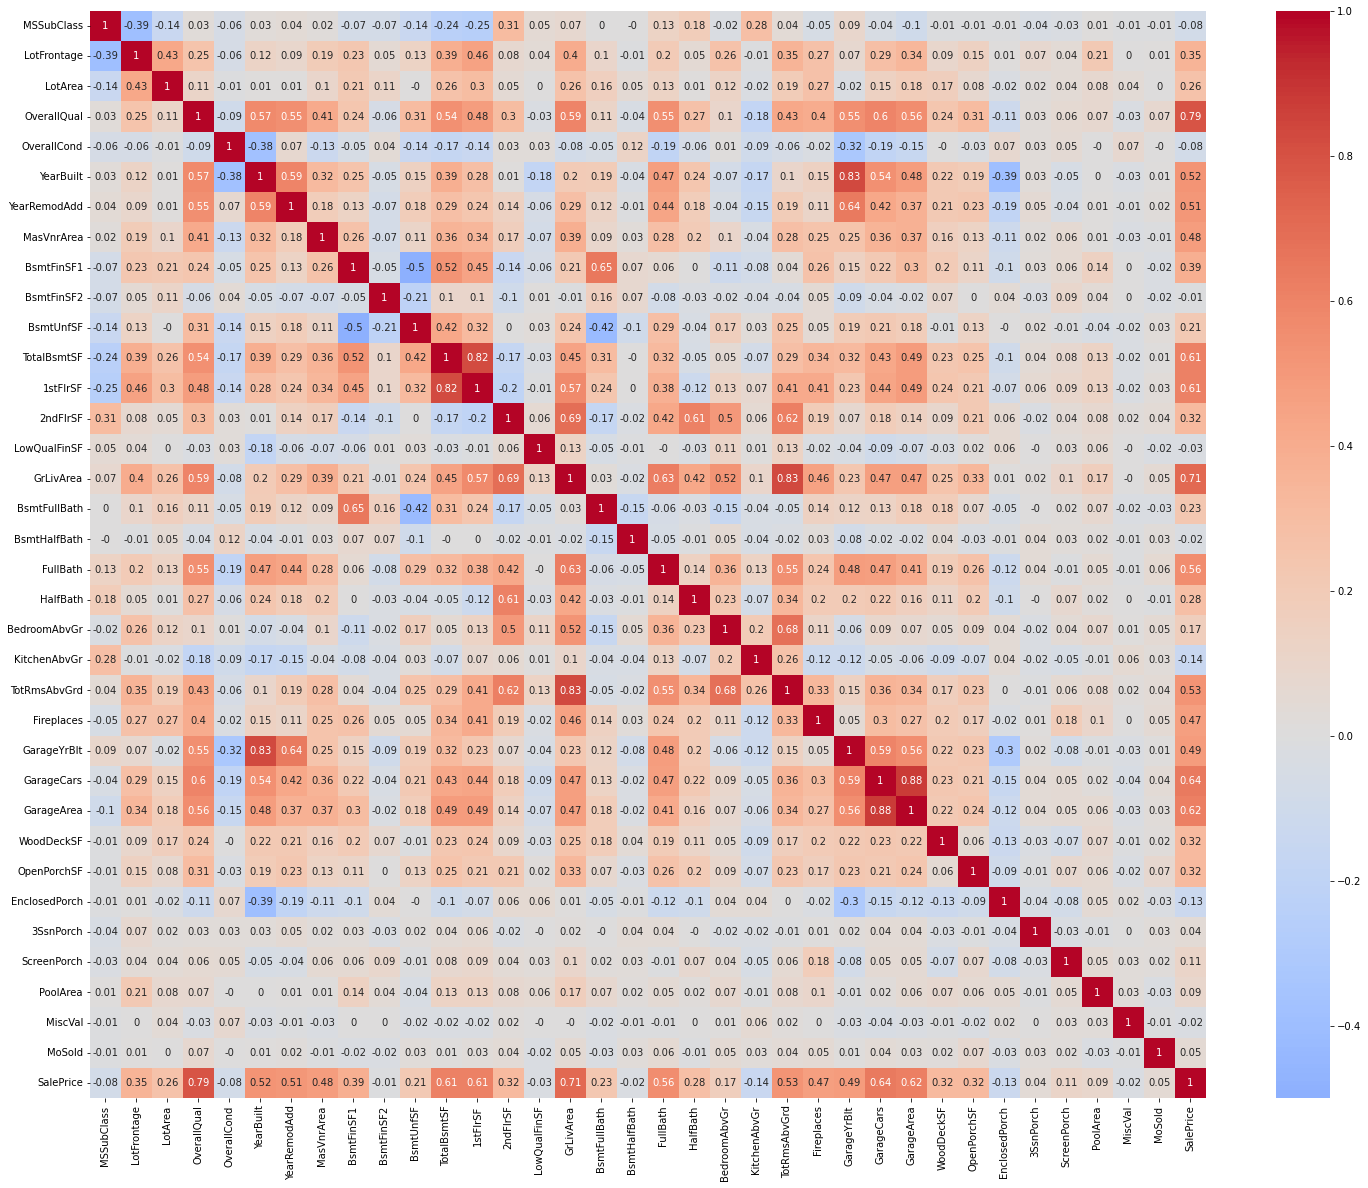

In [19]:
# Checking the corelation
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(df_num.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

We can see that there are highly correlated features. We will remove the highly corelated attributes after a few steps.

#### Data Preparation

In [20]:
# Creating a new Column to determine the age of the property
df['age']=df['YrSold']-df['YearBuilt']
df['garage_age'] = df['YrSold'] - df['GarageYrBlt']
df['remodel_age'] = df['YrSold'] - df['YearRemodAdd']

df.drop('GarageYrBlt',axis=1,inplace=True)

In [21]:
# We need to convert some Numerical Column to String columns since they are categorical variables. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [18]:
# Converting the Year to String since they are categorical features and should not be treated as numerical features
df[['MSSubClass']] = df[['MSSubClass']].astype(str) 
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave   NaN      Reg         Lvl   
1         20       RL         80.0     9600   Pave   NaN      Reg         Lvl   
2         60       RL         68.0    11250   Pave   NaN      IR1         Lvl   
3         70       RL         60.0     9550   Pave   NaN      IR1         Lvl   
4         60       RL         84.0    14260   Pave   NaN      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd

#### Handling missing values
Instead of dropping rows or columns, we impute the NaN values with None, Default or similar values, since by intuion it is assumed that when a certain feature is missing in that property, it is left blank during data collection


In [22]:
# getting list of columns with Null Values again
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),2) > 0 ] )

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
garage_age       5.55
GarageFinish     5.55
GarageType       5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


In [23]:
#From the Data Description
#NA = No Pool for PoolQC
df['PoolQC'] = df['PoolQC'].fillna('None')
#NA = No Misc Feature for MiscFeature
df['MiscFeature'] = df['MiscFeature'].fillna('None')
#NA = No Alley
df['Alley'] = df['Alley'].fillna('None')
#NA = No Fireplace for FireplaceQu
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
#NA = No Fence
df['Fence'] = df['Fence'].fillna('None')
#NA = No Fireplace
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
#NA = No Garage
df['GarageCond'] = df['GarageCond'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['garage_age'] = df['GarageQual'].fillna(0)   #No Garage No Age
#NA = No Basement
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
#NA = No Masonery Area
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [24]:
# getting list of columns with Null Values again
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),2) > 0 ] )

LotFrontage    17.74
dtype: float64


In [25]:
#LotFrontage : Replacing Null value with the median of the neighbourhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [26]:
round(df.isnull().sum()/len(df.index)*100,5).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),5) > 0 ]

Electrical    0.06849
dtype: float64

In [27]:
# Filling the Electrical 0.06% rows with the mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [28]:
round(df.isnull().sum()/len(df.index)*100,5).sort_values(ascending=False)

MSSubClass      0.0
GarageQual      0.0
GarageCars      0.0
GarageFinish    0.0
GarageType      0.0
               ... 
ExterQual       0.0
MasVnrArea      0.0
MasVnrType      0.0
Exterior2nd     0.0
remodel_age     0.0
Length: 82, dtype: float64

All the missing values have been taken care of.

#### Feature Engineering

In [29]:
print(df['Utilities'].value_counts())
print(df['Street'].value_counts())
print(df['PoolQC'].value_counts())

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64


Some columns have above 99% same values, thus it does not play any part on predicting the target variable

In [30]:
# Trying to remove redundant features
def redundant_feature(df):
    redundant = []
    for i in df.columns:
        counts = df[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df) * 100 > 99:
            redundant.append(i)
    redundant = list(redundant)
    return redundant

In [31]:
redundant_features = redundant_feature(df)
redundant_features

['Street', 'Utilities', 'PoolArea', 'PoolQC']

Dropping these features since they have more than 99% of a single category and thus play no part in the prediction

In [32]:
df.drop(redundant_features,axis=1,inplace=True)

In [33]:
df.shape

(1460, 78)

In [34]:
# Removing outliers to make the model more robust
# From EDA we see that Living Area, Garage Area, Basement Area and Lot Area. Removing outliers from these. Other outliers will be handled 
# during power transform
def drop_outliers(x):
    list = []
    outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
    for col in outl_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x  
df = drop_outliers(df)
df.shape

(1455, 78)

6 outliers have been removed

In [35]:
#Creating some new features based on the existing features
#Vintage house with remodified version of it plays a important role in prediction(i.e. high price )
df['YrBltAndRemod']=df['YearBuilt']+df['YearRemodAdd']
#Overall area for all floors and basement plays an important role, hence creating total area in square foot column
df['Total_sqr_footage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
# Creating derived column for total number of bathrooms column
df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
#Creating derived column for total porch area 
df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])

In [36]:
#Creating Dummy Variables for Categorical Columns
num_col=[]
cat_col=[]
for i in df.columns:
    if df[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
df_dummy= pd.get_dummies(df[cat_col])   
df=pd.concat([df,df_dummy],axis=1)
df= df.drop(cat_col,axis=1)        

In [37]:
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  \
0          2003       196.0         706           0  ...   
1          1976         0.0         978           0  ...   
2          2002       162.0         486           0  ...   
3          1970         0.0         216           0  ...   
4          2000       350.0         655           0  ...   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  garage_age_Ex  garage_age_Fa  garage_age_Gd  \
0                      0              0              0              0   
1                      0              0              0              0   
2                      0              0              0              0   
3                      0              0              0              0   
4                      0              0              0              0   

   garage_age_None  garage_age_Po  garage_age_TA  
0                0              0              1  
1                0              0              1  
2                0              0              1  
3                0              0              1  
4                0              0              1  

[5 rows x 304 columns]

In [42]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [43]:
# Checking co-related features
corr = X.corr()
corr1 = corr[abs(corr)>=.6]
corr2 =  corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))  #To remove repetition and 1 correlations
corr_result = corr2.stack()
print(corr_result[(abs(corr_result) > 0.6)])

MSSubClass            BldgType_1Fam           -0.816893
OverallQual           GarageCars               0.602025
                      YrBltAndRemod            0.628465
                      ExterQual_TA            -0.647338
YearBuilt             age                     -0.999036
                                                 ...   
SaleType_New          SaleCondition_Partial    0.986718
SaleType_WD           SaleCondition_Normal     0.632805
                      SaleCondition_Partial   -0.768294
SaleCondition_Normal  SaleCondition_Partial   -0.652835
garage_age_None       garage_age_TA           -0.718832
Length: 151, dtype: float64


In [45]:
X.drop(['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
        '1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars',
        'WoodDeckSF','YrBltAndRemod','Total_Bathrooms','MSZoning_FV','MSZoning_RL','Alley_Grvl','Alley_None','LotShape_IR1','LandContour_Bnk','LotConfig_Corner',
        'LandSlope_Gtl','Neighborhood_NPkVill','Condition1_Feedr','Condition2_Feedr','Condition2_RRAe','BldgType_1Fam',
        'HouseStyle_1Story','RoofStyle_Flat','RoofStyle_Gable','RoofMatl_CompShg','Exterior2nd_AsbShng','Exterior2nd_BrkFace',
        'Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Plywood',
        'Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','MasVnrType_None','ExterQual_Gd','ExterQual_TA',
        'ExterCond_Gd','Foundation_CBlock','Foundation_Slab','BsmtQual_Gd','BsmtQual_None','BsmtCond_Gd','BsmtCond_None',
        'BsmtCond_Po','BsmtExposure_None','BsmtFinType1_None','Heating_GasA','HeatingQC_Ex','CentralAir_N','Electrical_FuseA',
        'KitchenQual_Gd','GarageType_Attchd','GarageType_None','GarageFinish_None','GarageQual_Ex','GarageQual_Fa',
        'GarageQual_Gd','GarageQual_None','GarageQual_Po','GarageQual_TA','GarageCond_Ex','GarageCond_None','GarageCond_Po',
        'GarageCond_TA','PavedDrive_N','Fence_None','MiscFeature_None','SaleType_New','SaleType_WD','SaleCondition_Normal',
        'Foundation_PConc','MiscFeature_Gar2','Foundation_PConc','garage_age_None'],
         axis=1,inplace=True)

In [46]:
# Chekcing the shape after dropping all co-related columns
X.shape

(1455, 216)

In [47]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

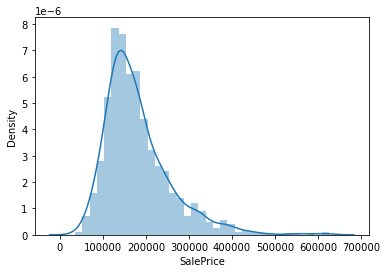

In [48]:
#Distribution of Target Variable
sns.distplot(y_train)
plt.show()

The Data is right-skewed. Tus we transform it to make it more gaussian.

In [49]:
#Transforming the Target feature to make the data gaussian
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

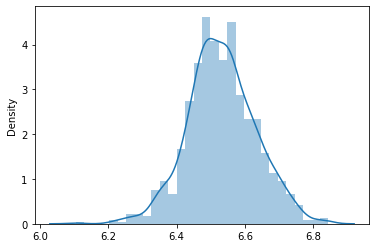

In [50]:
sns.distplot(y_train)
plt.show()

The target variable is now transformed.

In [51]:
# Scaling the data using a Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

In [52]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallCond  LowQualFinSF  BsmtFullBath  \
0    0.588235     0.068493  0.052116     0.428571           0.0           0.5   
1    0.000000     0.136986  0.128504     0.428571           0.0           0.5   
2    0.235294     0.150685  0.118124     0.428571           0.0           0.0   
3    0.000000     0.301370  0.106880     0.428571           0.0           0.0   
4    0.000000     0.236301  0.143217     0.428571           0.0           0.5   

   BsmtHalfBath  TotRmsAbvGrd  GarageArea  OpenPorchSF  ...  \
0           0.0      0.333333    0.418705     0.000000  ...   
1           0.0      0.555556    0.618705     0.083665  ...   
2           0.0      0.555556    0.312230     0.095618  ...   
3           0.0      0.222222    0.323741     0.000000  ...   
4           0.0      0.444444    0.505036     0.089641  ...   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                    0.0                    0.0                   0.0   
1                    0.0                    0.0                   0.0   
2                    0.0                    0.0                   0.0   
3                    0.0                    0.0                   0.0   
4                    0.0                    0.0                   0.0   

   SaleCondition_Family  SaleCondition_Partial  garage_age_Ex  garage_age_Fa  \
0                   0.0                    0.0            0.0            0.0   
1                   0.0                    0.0            0.0            0.0   
2                   0.0                    0.0            0.0            0.0   
3                   0.0                    0.0            0.0            0.0   
4                   0.0                    0.0            0.0            0.0   

   garage_age_Gd  garage_age_Po  garage_age_TA  
0            0.0            0.0            1.0  
1            0.0            0.0            1.0  
2            0.0            0.0            1.0  
3            0.0            0.0            1.0  
4            0.0            0.0            1.0  

[5 rows x 216 columns]

#### Ridge Regression

In [53]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

Fitting 11 folds for each of 28 candidates, totalling 308 fits


The optimum alpha is 2
The R2 Score of the model on the test dataset for optimum alpha is 0.8677603948267202
The MSE of the model on the test dataset for optimum alpha is 0.0014153354995624292


In [56]:
# Chekcing the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

Features    VIF
109   Exterior1st_WdShing    inf
108   Exterior1st_Wd Sdng    inf
145      BsmtFinType2_GLQ    inf
144      BsmtFinType2_BLQ    inf
143      BsmtFinType2_ALQ    inf
..                    ...    ...
16                    age  15.72
47   Neighborhood_Mitchel  15.30
42   Neighborhood_Crawfor  14.01
45    Neighborhood_IDOTRR  12.54
50   Neighborhood_NoRidge  12.52

[70 rows x 2 columns]

In [57]:
# Dropping cols with high VIF
X_train_rfe2 = X_train_rfe.drop(high_vif.Features,axis=1)
X_test_rfe2 = X_test_rfe.drop(high_vif.Features,axis=1)

Now we have all the columns which do not suffer from multicolinearity

Fitting 11 folds for each of 28 candidates, totalling 308 fits


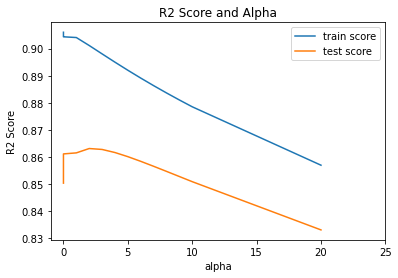

The optimum alpha is 2
The R2 Score of the model on the test dataset for optimum alpha is 0.8298747836867805
The MSE of the model on the test dataset for optimum alpha is 0.0018208180348340108


In [58]:
# Building the second Ridge Model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final2 = Ridge(alpha=alpha,random_state=100)
ridge_final2.fit(X_train_rfe2,y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred = ridge_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [59]:
#Displaing the co-efficients of the model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2),columns=X_train_rfe2.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(20)

Ridge Co-Efficient
Total_sqr_footage               0.171938
GarageArea                      0.102713
TotRmsAbvGrd                    0.072860
OverallCond                     0.054965
LotArea                         0.045293
LotFrontage                     0.033196
CentralAir_Y                    0.033166
Total_porch_sf                  0.029930
Neighborhood_StoneBr            0.029474
Alley_Pave                      0.027125
HouseStyle_2.5Unf               0.023504
SaleType_Con                    0.022779
Neighborhood_Veenker            0.022360
RoofMatl_WdShngl                0.022053
PavedDrive_P                    0.020937
OpenPorchSF                     0.020608
SaleType_Oth                    0.020033
LandContour_HLS                 0.019876
SaleType_CWD                    0.019765
ExterCond_Ex                    0.019537

The Top 20 features impacting the price of the property is stated above.

#### Lasso
For demonstration purposes, we try a Lasso Model as well to check it's overall perfromance.

In [60]:
# Creating a model with an arbitrary alpha to understand the value ranges
lasso1 = Lasso(alpha=0.0001)        
lasso1.fit(X_train_rfe2, y_train) 

y_test_pred = lasso1.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for 0.0001 alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The R2 Score of the model on the test dataset for 0.0001 alpha is 0.8270287491840184
The MSE of the model on the test dataset for optimum alpha is 0.0018512786041881054


There are total 75 features used in the Lasso Model

In [61]:
# Builsing a Lasso Model with GridSearch CV to find the optimum alpha
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso = Lasso(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_rfe2,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

Fitting 11 folds for each of 11 candidates, totalling 121 fits


The optimum alpha is 0.0001
The R2 Score of the model on the test dataset for optimum alpha is 0.8270287491840184
The MSE of the model on the test dataset for optimum alpha is 0.0018512786041881054


In [62]:
#Displaing the co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe2.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff2.head(20)

Lasso Co-Efficient
Total_sqr_footage               0.204527
GarageArea                      0.111960
TotRmsAbvGrd                    0.069046
OverallCond                     0.055030
LotArea                         0.042466
CentralAir_Y                    0.034728
Total_porch_sf                  0.027890
Alley_Pave                      0.025266
Neighborhood_StoneBr            0.024516
OpenPorchSF                     0.018147
LandContour_HLS                 0.017821
BsmtQual_Ex                     0.016338
Condition1_Norm                 0.016272
KitchenQual_Ex                  0.016054
PavedDrive_P                    0.015769
HouseStyle_2.5Unf               0.015749
Neighborhood_Veenker            0.015341
MasVnrType_Stone                0.014925
PavedDrive_Y                    0.013952
LotFrontage                     0.013575

The top 20 features of the final Lasso model is stated above.

### The Final Ridge Regression Model is as follows:-

In [63]:
ridge_final2

Ridge(alpha=2, random_state=100)

### The Final Lasso Regression Model is as follows:-

In [64]:
lasso_final2

Lasso(alpha=0.0001, random_state=100)

We are able to achieve an R2 score of 0.82 approx on both Ridge and Lasso Models. 
The follwing factors influence the house price the most as demosntrated by both the models:-
- Total area in square foot
- Total Garage Area
- Total Rooms
- Overall Condition
- Lot Area
- Centrally Air Conditioned
- Total Porch Area (Open + Enclosed)
- Kitchen Quality
- Basement Quality